<a href="https://colab.research.google.com/github/abunchoftigers/Prediction-of-Product-Sales/blob/main/Classification_Metrics_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics Exercise (Core)

  * Author: David Dyer

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# from sklearn.linear_model import LinearRegression

from sklearn import set_config
set_config(transform_output='pandas')

from google.colab import drive
import warnings

warnings.simplefilter('ignore')

# Get the Data

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
fpath = '/content/drive/MyDrive/Coding Dojo - Data Science/02 - Intro to Machine Learning/Data/stroke.csv'
df = pd.read_csv(fpath)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


# Prepare the Data


1. Check for class balance with value_counts

In [ ]:
df.stroke.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1132    0
1133    0
1134    0
1135    1
1136    0
Name: stroke, Length: 1137, dtype: int64>

In [ ]:
try:
  df = df.drop(columns='id')
except:
  print('id col already dropped!')

## Clean the Data

In [ ]:
df.select_dtypes('number').value_counts

<bound method DataFrame.value_counts of       hypertension  heart_disease  avg_glucose_level   bmi  stroke
0                0              0              70.66  27.2       0
1                0              0              85.81  18.6       0
2                0              0              60.56  33.0       0
3                0              0             205.77  46.0       1
4                0              0              90.42  16.2       0
...            ...            ...                ...   ...     ...
1132             0              0             110.17  20.3       0
1133             0              0              92.98  18.9       0
1134             0              0             234.35  25.3       0
1135             1              0              80.43  29.7       1
1136             1              0             108.61  38.1       0

[1137 rows x 5 columns]>

## Clean the Data

2. Prepare a column transformer for preprocessing​

In [ ]:
for col in df.columns:
  print(col, '\n', df[col].value_counts(), '\n')

gender 
 Female    642
Male      494
Other       1
Name: gender, dtype: int64 

age 
 79     26
57     24
78     24
52     23
81     22
       ..
3       7
35      7
12      6
4       6
*82     1
Name: age, Length: 84, dtype: int64 

hypertension 
 0    1002
1     135
Name: hypertension, dtype: int64 

heart_disease 
 0    1059
1      78
Name: heart_disease, dtype: int64 

ever_married 
 Yes    769
No     368
Name: ever_married, dtype: int64 

work_type 
 Private          672
Self-employed    174
children         147
Govt_job         142
Never_worked       2
Name: work_type, dtype: int64 

Residence_type 
 Urban    587
Rural    550
Name: Residence_type, dtype: int64 

avg_glucose_level 
 92.14     3
94.92     2
203.81    2
72.09     2
76.12     2
         ..
190.13    1
232.81    1
100.09    1
114.76    1
108.61    1
Name: avg_glucose_level, Length: 1069, dtype: int64 

bmi 
 27.3    11
31.4    11
26.1    11
28.7    11
35.9    11
        ..
54.6     1
45.5     1
44.5     1
46.1     1
4

In [ ]:
df.age = df.age.replace('*82', 82).astype(np.int)

df.age.describe()

count    1137.000000
mean       45.189094
std        23.070207
min         0.000000
25%        28.000000
50%        48.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df.avg_glucose_level.describe()

count    1137.000000
mean      107.664002
std        47.618723
min        55.270000
25%        77.600000
50%        91.820000
75%       113.850000
max       266.590000
Name: avg_glucose_level, dtype: float64

In [ ]:
try:
  X = df.drop(columns='stroke')
  y = df.stroke
except: 'X or y already set'

X, y

(      gender  age  hypertension  heart_disease ever_married work_type  \
 0     Female   31             0              0           No  Govt_job   
 1     Female   13             0              0           No  children   
 2       Male   18             0              0           No   Private   
 3     Female   65             0              0          Yes   Private   
 4       Male    4             0              0           No  children   
 ...      ...  ...           ...            ...          ...       ...   
 1132  Female    1             0              0           No  children   
 1133    Male    6             0              0           No  children   
 1134    Male   81             0              0          Yes   Private   
 1135  Female   81             1              0          Yes   Private   
 1136  Female   57             1              0          Yes   Private   
 
      Residence_type  avg_glucose_level   bmi   smoking_status  
 0             Rural              70.66  27.2

3. Build and fit a model pipeline with the preprocessor and a default decisiontreeclassifer (use a random_state of 42)

## Create our Preprocessor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
obj_cols = X_train[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].columns
num_cols = X_train.drop(columns=obj_cols).columns

obj_cols, '', num_cols

(Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
        'Residence_type', 'smoking_status'],
       dtype='object'),
 '',
 Index(['age', 'avg_glucose_level', 'bmi'], dtype='object'))

In [ ]:
obj_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

### Cateorgical Pipeline

In [ ]:
ohe_encoder = OneHotEncoder(categories='auto', sparse_output=False, handle_unknown='ignore')
# ohe_encoder.fit(X_train)
ohe_encoder.fit(X_train, y_train)
ohe_pipe = make_pipeline(ohe_encoder)

ohe_pipe, '', ohe_encoder

(Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 '',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [ ]:
ohe_pipe.fit(X_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Numeric Pipeline

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
obj_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [ ]:
ohe_tuple = ('categorical', ohe_pipe, obj_cols)
num_tuple = ('numeric', num_pipe, num_cols)

In [ ]:
ohe_tuple, '', num_tuple

(('categorical',
  Pipeline(steps=[('onehotencoder',
                   OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
         'Residence_type', 'smoking_status'],
        dtype='object')),
 '',
 ('numeric',
  Pipeline(steps=[('simpleimputer', SimpleImputer()),
                  ('standardscaler', StandardScaler())]),
  Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')))

In [ ]:
preprocessor = ColumnTransformer([ohe_tuple, num_tuple], verbose_feature_names_out=False)
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'avg_glucose_level', 'bmi'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

X_train_tf.head()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
72,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.567568,-0.340638,1.052941
1091,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.689078,0.177741,1.449535
381,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.733003,0.335373,-0.123165
760,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.293758,-0.443857,-0.738570
433,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.161984,-0.778643,-0.259922


# Evaluate

## Instantiate

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Run Evaluation Metrics

4. Evaluate the classification model using the custom function to produce the confusion matrix and classification report.


In [ ]:
# Define predicted values
y_pred_train = rf_pipe.predict(X_train)
y_pred_test = rf_pipe.predict(X_test)

train_acc = accuracy_score(y_pred_train, y_train).round(3)
test_acc =  accuracy_score(y_pred_test, y_test).round(3)

print(f'Training accuracy : {train_acc}.')
print(f'Testing accuracy : {test_acc}.')

Training accuracy : 1.0.
Testing accuracy : 0.867.


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[245,   6],
       [ 32,   2]])

In [ ]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,245,6
1,32,2


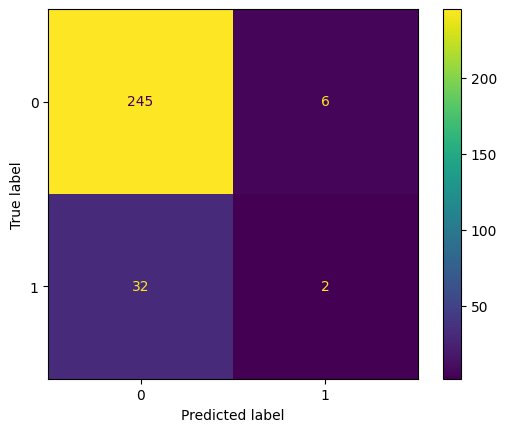

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [ ]:
label = 'Test Data'
header = '-'*60

report = classification_report(y_test, y_pred_test)

print(header, f'Classification Metrics: {label}', header, sep='\n')
print(report)

------------------------------------------------------------
Classification Metrics: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       251
           1       0.25      0.06      0.10        34

    accuracy                           0.87       285
   macro avg       0.57      0.52      0.51       285
weighted avg       0.81      0.87      0.83       285



In a text cell, answer the following:

1. What was the overall accuracy of the model? (Considering the accuracy and class balance, how would you describe the default model's performance?)
  - 0.87. Because the classes are close to balanced, the weighted accuracy of .83 is a realistic measure of the model's performance.

2. Using this model, what percentage of  the predictions would cause an unnecessary stroke alert for a patient that did not end up having a stroke? (A false positive)?
  - 19%

3. Using this model, what percentage of the predictions would miss warning a patient who ended up having a stroke (False Negatives)
  - 13%

4. Considering this dataset is used to identify stokes which metric do you think would be important to optimize? Why?
  - Recall, because the the things you do to prevent a stroke (healthy diet, excercise, etc.) are generally good things anyone. The cost of false negatives is low and the cost of false positives is very high.